In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

1.Choose one variable and plot that variable four different ways.

2.Choose two continuous variables, and plot them three different ways.

3.Choose one continuous variable and one categorical variable, and plot them six different ways.

I am going to use the Pokemon data that I previously used for a project in the pre-course. 
Below I am going to clean up my data based on my knowledge of the data set.

In [2]:
df =pd.read_csv('pokemon.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.','')
#df = df.set_index(['#']) 
df=df.drop(['#','generation','legendary'],axis=1)
df.name = df.name.str.replace(".*(?=Mega)", "")
df['type_2'].fillna(df['type_1'], inplace=True)

In [3]:
df.head(10)

,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,Fire,309,39,52,43,60,50,65
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80
6,Charizard,Fire,Flying,534,78,84,78,109,85,100
7,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
8,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100
9,Squirtle,Water,Water,314,44,48,65,50,64,43


# 1.Choose one variable and plot that variable four different ways.

I am going to go with the variable total, which is the sum of the various attribute levels (i.e. hp, attack, defense).

In [5]:
hp_power = pd.DataFrame(df['hp'])
hp_power.hp.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

## Histogram

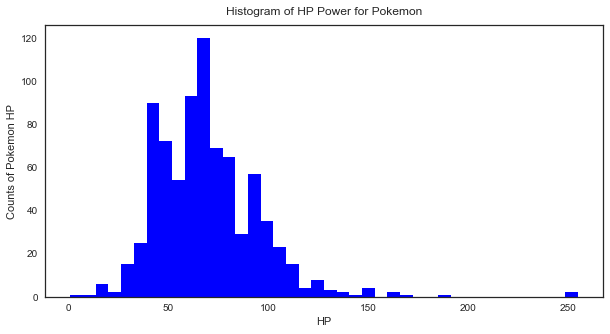

In [8]:
f, ax = plt.subplots(figsize=(10,5))
sns.set(style="white", palette="muted")
sns.distplot(hp_power, kde=False, color="b", hist_kws={"alpha":1})
ax.set(xlabel="HP")
ax.set(ylabel="Counts of Pokemon HP")
plt.title('Histogram of HP Power for Pokemon')
rcParams['axes.titlepad'] = 10
plt.show()

This is a histogram of HP Power of all Pokemon. It reveals the distribution of my data and the count of items in each bin. While this is very useful for exploratory data analysis, there are better ways to visualize outliers and the individual values at each index. 

## Combined Histogram/KDE

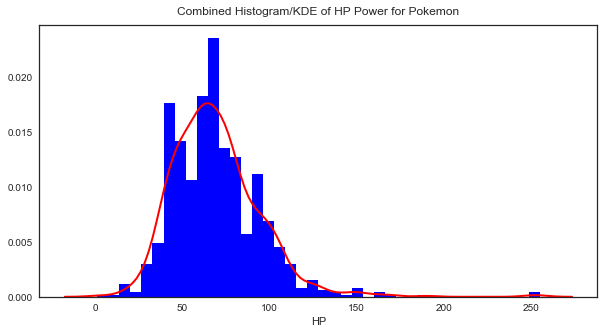

In [7]:
f, ax = plt.subplots(figsize=(10,5))
sns.set(style="white", palette="muted")
sns.distplot(hp_power, rug=False,
             kde_kws={"color": "r", "lw": 2},
             hist_kws={ "alpha":1,"lw": 2, "color": "b"})
ax.set(xlabel="HP")
plt.title('Combined Histogram/KDE of HP Power for Pokemon')
rcParams['axes.titlepad'] = 10
plt.show()

This is a combined Histogram with a Kernel Density Estimation, which is very useful for further identifying the distribution of the data. The benefit of combining the KDE with the histogram, is that now we get a better sense of the count of Pokemon at each HP level at a particular point of the KDE curve. 

## Boxplot

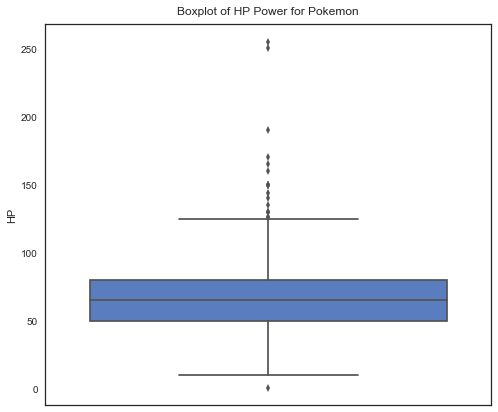

In [9]:
f, ax = plt.subplots(figsize=(8,7))
sns.set(style="white", palette="muted")
sns.boxplot(data=hp_power)
ax.set(xticks=[])
ax.set(ylabel="HP")
plt.title('Boxplot of HP Power for Pokemon')
rcParams['axes.titlepad'] = 10
plt.show()

The boxplot is good for further examining the data, by displaying the median, first and third quartile, and any outliers. It is good for showing the range of the data, but like the histogram, it is very broad. Also, there are better methods to look at how the data is distributed. 

## Violin Plot

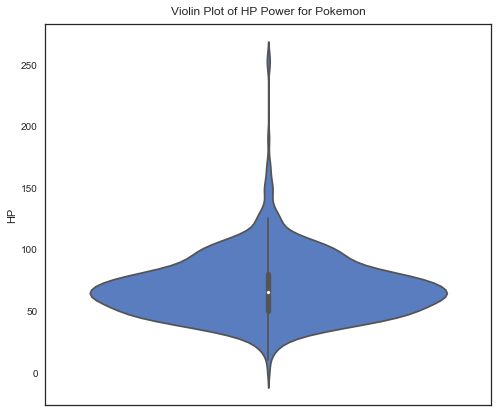

In [10]:
f, ax = plt.subplots(figsize=(8,7))
sns.set(style="white", palette="muted")
sns.violinplot(y=hp_power.hp, data=hp_power)
ax.set(xticks=[])
ax.set(ylabel="HP")
plt.title('Violin Plot of HP Power for Pokemon')
rcParams['axes.titlepad'] = 10
plt.show()

The violin plot is very similar to a boxplot (including the whiskers, IQR, and median), however, it also includes a kernel density estimation of the underlying distribution. Unlike the boxplot though, the basic violin plot does not show us the outliers. 

# 2. Choose two continuous variables, and plot them three different ways.

I am going to look at Attack and Defense as my continuous variables

## Scatterplot

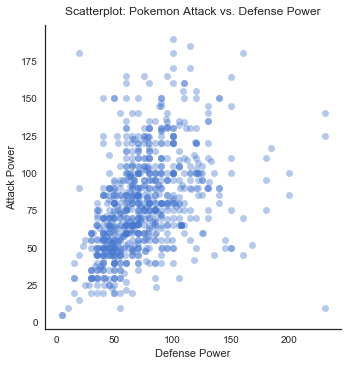

In [11]:
sns.set(style="white", palette="muted")
plt.rcParams["figure.figsize"] = (10,10)
sns.lmplot(y='attack', x='defense', data= df,fit_reg=False, scatter_kws={'alpha':0.4}) 
plt.ylabel("Attack Power")
plt.xlabel("Defense Power")
plt.title('Scatterplot: Pokemon Attack vs. Defense Power')
rcParams['axes.titlepad'] = 10
plt.show()

Scatterplots are useful for looking at the associations between my Attack and Defense variables. 
However, it is hard to discern meaning from looking at this, as most of the points are clumped closely together. 
I might have too many observations in my dataset to make this visualization meaningful. 


## Hexbin Plots


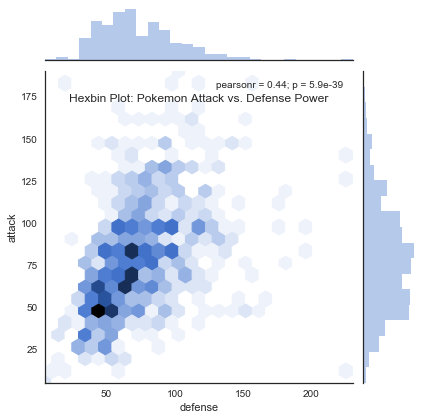

In [13]:
sns.set(style="white", palette="muted")
plt.rcParams["figure.figsize"] = (10,10)
a=sns.jointplot(y='attack', x='defense', data= df, kind="hex") 
a.ax_joint.set_title('Hexbin Plot: Pokemon Attack vs. Defense Power')
rcParams['axes.titlepad'] = -30
plt.show()

Hexbin plots are useful, as they show the counts of observations within hexagonal bins, and works best with datasets that contain a large number of observations. Also, the variations in coloration is useful to see where most Pokemon lie in terms of Attack and Defense. However, this might be confusing to interpret from someone not familar with this type of plot. 

## KDE

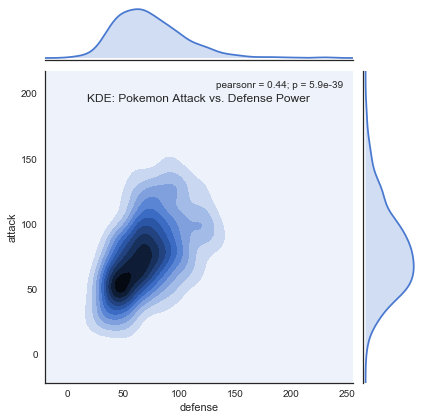

In [14]:
sns.set(style="white", palette="muted")
plt.rcParams["figure.figsize"] = (10,10)
a=sns.jointplot(y='attack', x='defense', data= df, kind="kde") 
a.ax_joint.set_title('KDE: Pokemon Attack vs. Defense Power')
plt.show()

This plot is like the Hexbin, but now it is easier to visualize the bivariate distribution of my variables. It also makes it easier to pin point a focused center of Attack and Defense for the Pokemon in my dataset, and visualize where my overservations overlap.However, unlike the Hexbin plot, this plot does not do well at visualizing my outliers, that do not lie near the center. 

# 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

I am going to look at Pokemon Type (1) and Attack as my categorical and continuous variables, respectively. 
Since there are a lot of different type of Pokemon, I am only going to look at the top 6 types in terms of count of Pokemon.

In [15]:
df.type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64

In [16]:
df2= df[(df['type_1']=='Water') | (df['type_1']=='Normal') 
                                | (df['type_1']=='Grass') | (df['type_1']=='Bug')
                                | (df['type_1']=='Psychic')
                                | (df['type_1']=='Fire')]


## Barplot

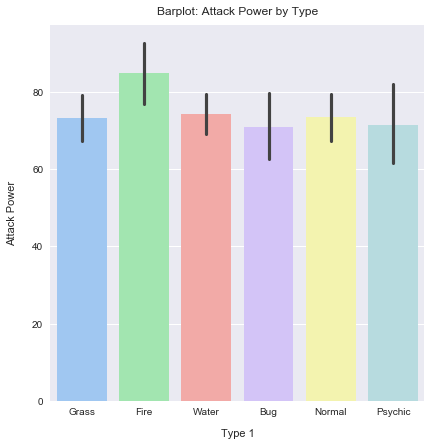

In [115]:
sns.set(style="darkgrid", palette="muted")
sns.factorplot(x="type_1", y="attack", data=df2,
                   size=6, kind="bar", palette="pastel", ci=95)
plt.ylabel('Attack Power', labelpad=15)
plt.xlabel('Type 1', labelpad=12)
plt.title('Barplot: Attack Power by Type')
rcParams['axes.titlepad'] = 10
plt.show()

This barplot is good for visualizing the mean Attack power of the most common types, as well as the uncertainty associated with the means. The benefit of this type of graph is that it shows how confident we can be about the visualized means and where we might have to do more investigation. However, these plots are inefficient in terms of the space wasted (while is it still necessary to start at 0). They can also be misleading, because the brain looks at the difference between the groups relative to the total height of the bars. This is a problem because group differences should be evaluated based on the size of the error bars, not the height of the bars itself.

## Point Plot

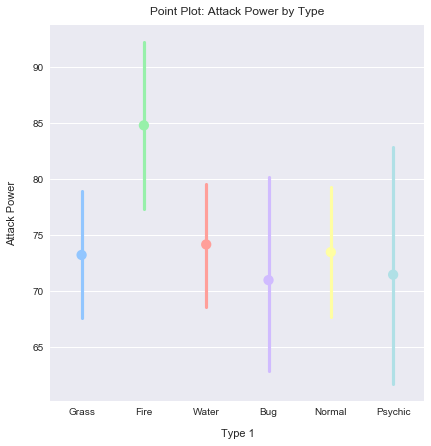

In [116]:
sns.set(style="darkgrid", palette="muted")
sns.factorplot(x="type_1", y="attack", data=df2,
                   size=6, kind="point", palette="pastel", ci=95, dodge=True, join=False)
plt.ylabel('Attack Power', labelpad=15)
plt.xlabel('Type 1', labelpad=12)
plt.title('Point Plot: Attack Power by Type')
rcParams['axes.titlepad'] = 10
plt.show()

A pointplot has all the strengths of a barplot without many of its weaknesses. Pointplots use much less space to convey the same information, and the difference in size between the groups is rightly compared to the size of the error bars. The size of the error bars are also easier to discern. However, this plot is bad for visualizing the size of the groups, as well as outliers that may exist. 

## Swarm Plot

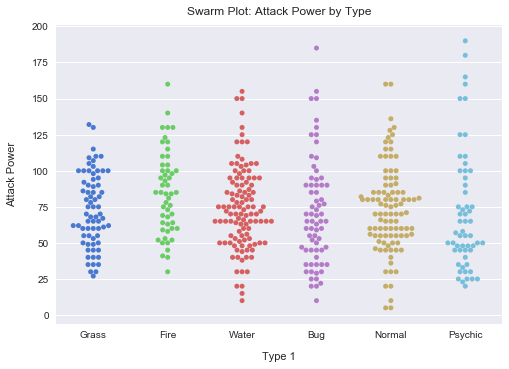

In [94]:
sns.set(style="darkgrid", palette="muted")
sns.swarmplot(x="type_1", y="attack", data=df2)
plt.ylabel('Attack Power', labelpad=15)
plt.xlabel('Type 1', labelpad=12)
plt.title('Swarm Plot: Attack Power by Type')
rcParams['axes.titlepad'] = 10
plt.show()

Swarm plots are good to visualize the distribution of the data, and where the attack power of pokemon seem to cluster. However, swarm plots are poor at showing where the median, IQR, and outliers lie (i.e. the relative significance of the individual data points). 

## Boxplot

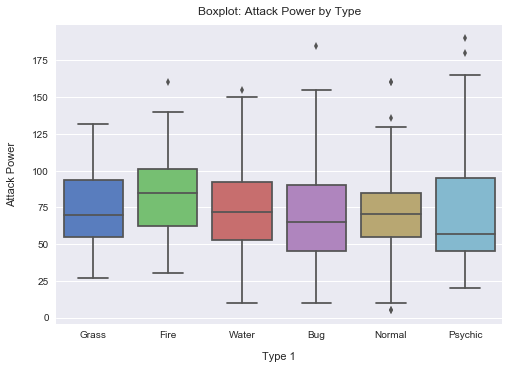

In [95]:
sns.set(style="darkgrid", palette="muted")
sns.boxplot(x="type_1", y="attack", data=df2)
plt.ylabel('Attack Power', labelpad=15)
plt.xlabel('Type 1', labelpad=12)
plt.title('Boxplot: Attack Power by Type')
rcParams['axes.titlepad'] = 10
plt.show()

The boxplot gives us good statistical info like median, the IQR, and where the outliers are. It is good for visualizing the range of the data for each group, and the relative differences between each group. However, it is not good at looking at the how the data points are distributed at the different attack levels. 

## Violin Plots

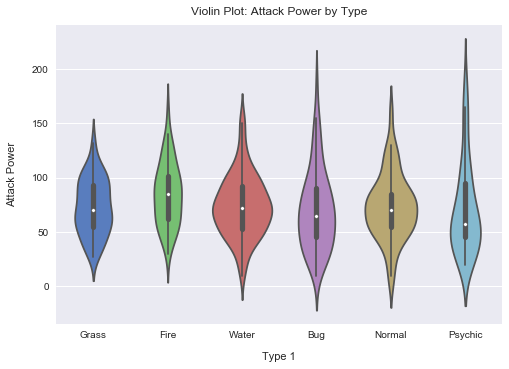

In [21]:
sns.set(style="darkgrid", palette="muted")
sns.violinplot(x="type_1", y="attack", data=df2, scale="count")
plt.ylabel('Attack Power', labelpad=15)
plt.xlabel('Type 1', labelpad=12)
plt.title('Violin Plot: Attack Power by Type')
rcParams['axes.titlepad'] = 10
plt.show()

The violin plot is very similar to a boxplot (including the whiskers, IQR, and median), however, it also includes a kernel density estimation of the underlying distribution. Unlike the boxplot though, the basic violin plot does not show us the outliers. 

## Combined Violin and Swarm Plot

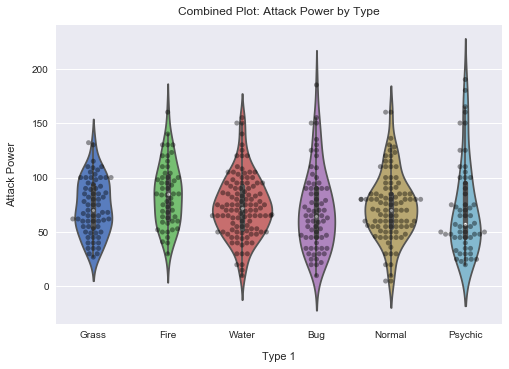

In [22]:
sns.set(style="darkgrid", palette="muted")
sns.violinplot(x="type_1", y="attack", data=df2, scale="count")
sns.swarmplot(x="type_1", y="attack", data=df2, color="black", alpha=.4)
plt.ylabel('Attack Power', labelpad=15)
plt.xlabel('Type 1', labelpad=12)
plt.title('Combined Plot: Attack Power by Type')
rcParams['axes.titlepad'] = 10
plt.show()

This combined plot now shows us all of the info that the violin and boxplot provide, and allows us to visualize the individual data points like a swarm plot. 

# Challenge

Here I am going to look at Attack, Defense, HP, and Speed, and look at the top 3 most common types (as more would cause clutter)

In [21]:
df3= df[(df['type_1']=='Water') | (df['type_1']=='Normal') 
                                | (df['type_1']=='Grass')]
df3= df3[['type_1','attack','defense','hp','speed']]


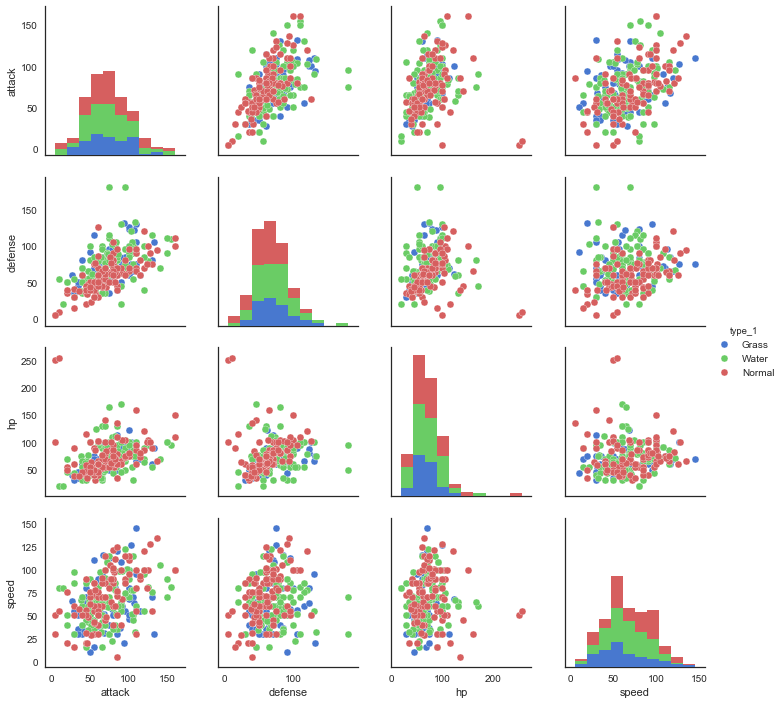

In [22]:
sns.set(style="white", palette="muted")
g = sns.pairplot(df3, hue='type_1')
plt.show()